=== UČITAVANJE PODATAKA ===
Dimenzije skupa podataka: (20640, 8)
Broj uzoraka: 20640
Broj feature-a: 8
Opseg cena: $0.15 - $5.00 hiljada

Prvih 5 redova podataka:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  

=== PODELE PODATAKA ===
Trening skup: 11558 uzoraka
Validacioni skup: 4954 uzoraka
Test skup: 4128 uzoraka

=== INICIJALIZACIJA MODELA ===
Broj modela za testiranje: 9
 - Linear Regression
 - Ridge Regression
 - Lasso Regression
 - Decision Tree
 

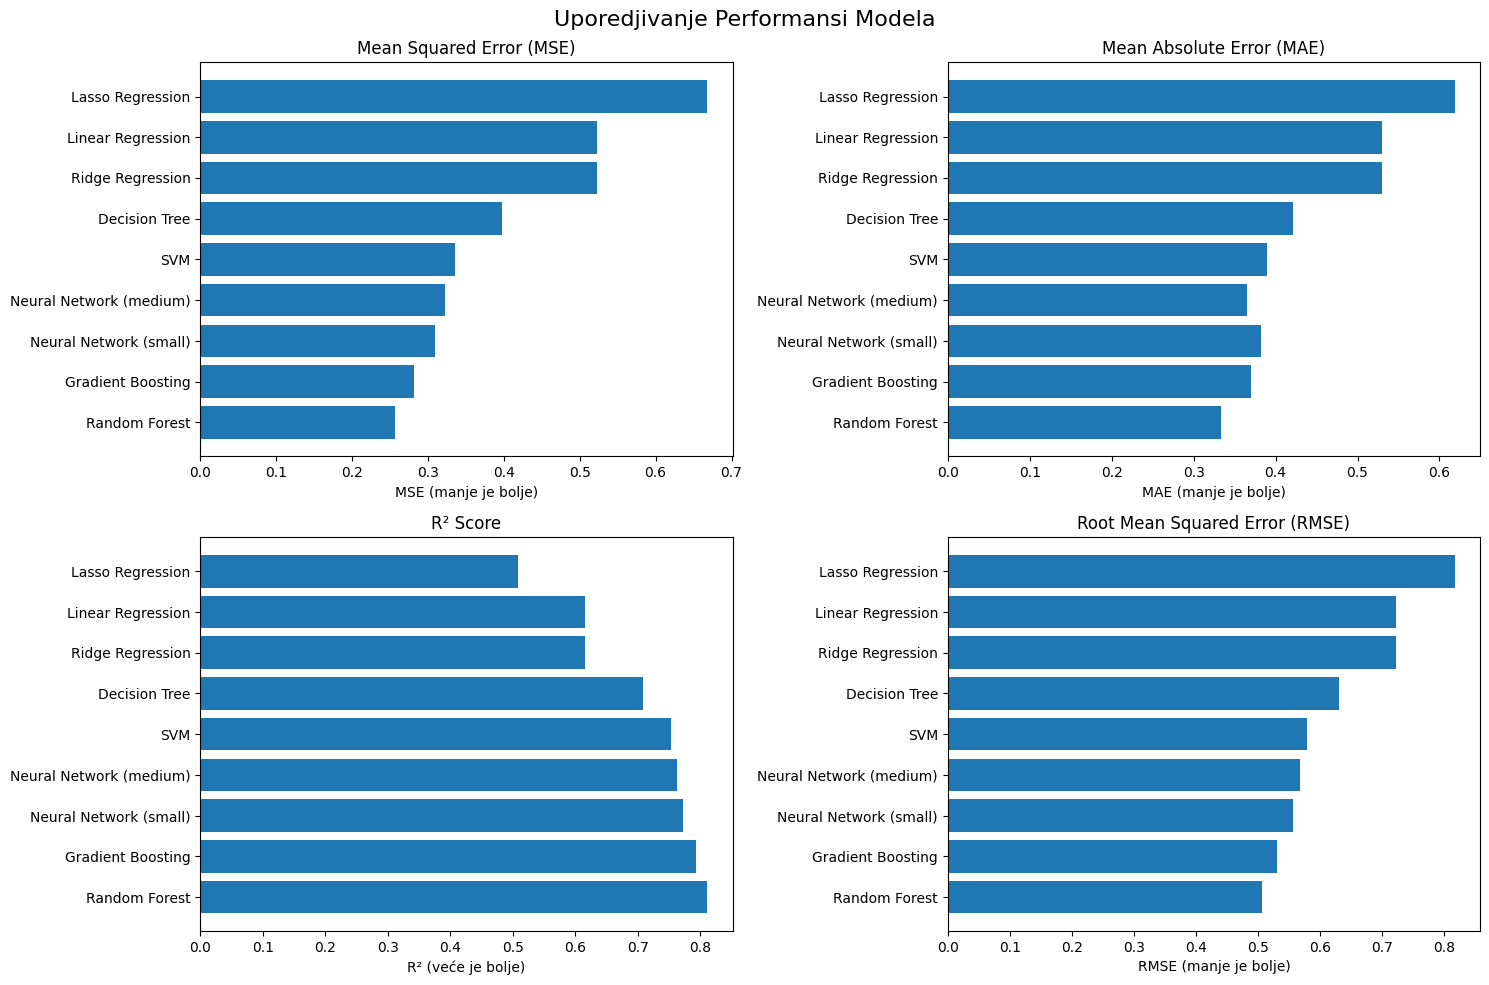


=== TESTIRANJE NAJBOLJEG MODELA ===
Najbolji model: Random Forest
Rezultati na TEST skupu:
  MSE: 0.2607
  MAE: 0.3345
  R²: 0.8010
  RMSE: 0.5106


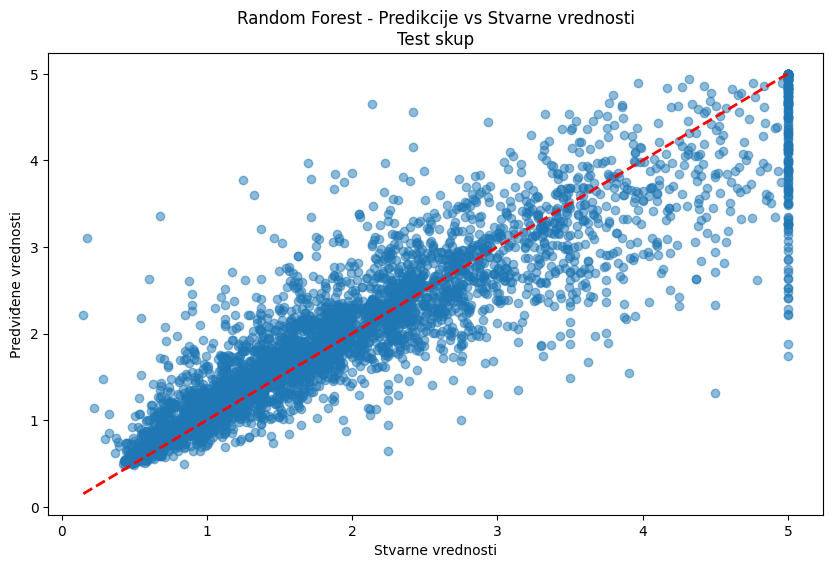

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Algoritmi koje ćemo testirati
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

class CaliforniaHousingPredictor:
    def __init__(self):
        self.data = None
        self.X = None
        self.y = None
        self.X_train = None
        self.X_val = None
        self.X_test = None
        self.y_train = None
        self.y_val = None
        self.y_test = None
        self.scaler = StandardScaler()
        self.models = {}
        self.results = {}

    def load_and_prepare_data(self):
        """Učitavanje i priprema podataka"""
        print("=== UČITAVANJE PODATAKA ===")

        # Učitavanje California Housing dataset-a
        california = fetch_california_housing()

        # Kreiranje DataFrame-a
        self.data = pd.DataFrame(california.data, columns=california.feature_names)
        self.data['PRICE'] = california.target

        # Features (X) i target (y)
        self.X = california.data
        self.y = california.target

        print(f"Dimenzije skupa podataka: {self.X.shape}")
        print(f"Broj uzoraka: {self.X.shape[0]}")
        print(f"Broj feature-a: {self.X.shape[1]}")
        print(f"Opseg cena: ${self.y.min():.2f} - ${self.y.max():.2f} hiljada")
        print("\nPrvih 5 redova podataka:")
        print(self.data.head())

    def split_data(self):
        """Podela podataka na trening, validacioni i test skup"""
        print("\n=== PODELE PODATAKA ===")

        # Prvo podela na trening+validaciju (80%) i test (20%)
        X_temp, self.X_test, y_temp, self.y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42
        )

        # Zatim podela trening+validaciju na trening (70%) i validacioni (30%)
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(
            X_temp, y_temp, test_size=0.3, random_state=42
        )

        # Skaliranje podataka (važno za neuronske mreže i neke druge algoritme)
        self.X_train = self.scaler.fit_transform(self.X_train)
        self.X_val = self.scaler.transform(self.X_val)
        self.X_test = self.scaler.transform(self.X_test)

        print(f"Trening skup: {self.X_train.shape[0]} uzoraka")
        print(f"Validacioni skup: {self.X_val.shape[0]} uzoraka")
        print(f"Test skup: {self.X_test.shape[0]} uzoraka")

    def initialize_models(self):
        """Inicijalizacija svih modela koje ćemo testirati"""
        print("\n=== INICIJALIZACIJA MODELA ===")

        self.models = {
            # Linearni modeli
            'Linear Regression': LinearRegression(),
            'Ridge Regression': Ridge(alpha=1.0, random_state=42),
            'Lasso Regression': Lasso(alpha=0.1, random_state=42),

            # Tree-based modeli
            'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
            'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
            'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),

            # Neuronske mreže
            'Neural Network (small)': MLPRegressor(
                hidden_layer_sizes=(50, 25),
                max_iter=1000,
                random_state=42,
                early_stopping=True,
                validation_fraction=0.1
            ),
            'Neural Network (medium)': MLPRegressor(
                hidden_layer_sizes=(100, 50, 25),
                max_iter=1000,
                random_state=42,
                early_stopping=True,
                validation_fraction=0.1
            ),

            # Support Vector Machine
            'SVM': SVR(kernel='rbf', C=1.0)
        }

        print(f"Broj modela za testiranje: {len(self.models)}")
        for name in self.models.keys():
            print(f" - {name}")

    def train_and_evaluate_models(self):
        """Treniranje i evaluacija svih modela"""
        print("\n=== TRENIRANJE I EVALUACIJA ===")

        self.results = {}

        for name, model in self.models.items():
            print(f"\nTreniranje: {name}")

            # Treniranje modela
            model.fit(self.X_train, self.y_train)

            # Predikcije na validacionom skupu
            y_val_pred = model.predict(self.X_val)

            # Evaluacione metrike
            mse = mean_squared_error(self.y_val, y_val_pred)
            mae = mean_absolute_error(self.y_val, y_val_pred)
            r2 = r2_score(self.y_val, y_val_pred)
            rmse = np.sqrt(mse)

            self.results[name] = {
                'model': model,
                'mse': mse,
                'mae': mae,
                'r2': r2,
                'rmse': rmse
            }

            print(f"  MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}, RMSE: {rmse:.4f}")

    def compare_models(self):
        """Uporedjivanje performansi modela"""
        print("\n=== UPOREDJIVANJE MODELA ===")

        # Kreiranje DataFrame-a sa rezultatima
        results_df = pd.DataFrame({
            'Model': list(self.results.keys()),
            'MSE': [self.results[name]['mse'] for name in self.results.keys()],
            'MAE': [self.results[name]['mae'] for name in self.results.keys()],
            'R²': [self.results[name]['r2'] for name in self.results.keys()],
            'RMSE': [self.results[name]['rmse'] for name in self.results.keys()]
        }).sort_values('RMSE')

        print("Rezultati sortirani po RMSE (manje je bolje):")
        print(results_df.to_string(index=False))

        return results_df

    def visualize_results(self, results_df):
        """Vizualizacija rezultata"""
        print("\n=== VIZUALIZACIJA REZULTATA ===")

        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('Uporedjivanje Performansi Modela', fontsize=16)

        # MSE plot
        axes[0,0].barh(results_df['Model'], results_df['MSE'])
        axes[0,0].set_title('Mean Squared Error (MSE)')
        axes[0,0].set_xlabel('MSE (manje je bolje)')

        # MAE plot
        axes[0,1].barh(results_df['Model'], results_df['MAE'])
        axes[0,1].set_title('Mean Absolute Error (MAE)')
        axes[0,1].set_xlabel('MAE (manje je bolje)')

        # R² plot
        axes[1,0].barh(results_df['Model'], results_df['R²'])
        axes[1,0].set_title('R² Score')
        axes[1,0].set_xlabel('R² (veće je bolje)')
        axes[1,0].axvline(x=0, color='red', linestyle='--')

        # RMSE plot
        axes[1,1].barh(results_df['Model'], results_df['RMSE'])
        axes[1,1].set_title('Root Mean Squared Error (RMSE)')
        axes[1,1].set_xlabel('RMSE (manje je bolje)')

        plt.tight_layout()
        plt.show()

    def test_best_model(self):
        """Testiranje najboljeg modela na test skupu"""
        print("\n=== TESTIRANJE NAJBOLJEG MODELA ===")

        # Pronalaženje najboljeg modela po RMSE
        best_model_name = min(self.results.keys(),
                             key=lambda x: self.results[x]['rmse'])
        best_model = self.results[best_model_name]['model']

        print(f"Najbolji model: {best_model_name}")

        # Predikcije na test skupu
        y_test_pred = best_model.predict(self.X_test)

        # Evaluacija na test skupu
        test_mse = mean_squared_error(self.y_test, y_test_pred)
        test_mae = mean_absolute_error(self.y_test, y_test_pred)
        test_r2 = r2_score(self.y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)

        print(f"Rezultati na TEST skupu:")
        print(f"  MSE: {test_mse:.4f}")
        print(f"  MAE: {test_mae:.4f}")
        print(f"  R²: {test_r2:.4f}")
        print(f"  RMSE: {test_rmse:.4f}")

        # Vizualizacija predikcija vs stvarne vrednosti
        plt.figure(figsize=(10, 6))
        plt.scatter(self.y_test, y_test_pred, alpha=0.5)
        plt.plot([self.y_test.min(), self.y_test.max()],
                [self.y_test.min(), self.y_test.max()], 'r--', lw=2)
        plt.xlabel('Stvarne vrednosti')
        plt.ylabel('Predviđene vrednosti')
        plt.title(f'{best_model_name} - Predikcije vs Stvarne vrednosti\nTest skup')
        plt.show()

    def run_complete_analysis(self):
        """Pokretanje kompletne analize"""
        self.load_and_prepare_data()
        self.split_data()
        self.initialize_models()
        self.train_and_evaluate_models()
        results_df = self.compare_models()
        self.visualize_results(results_df)
        self.test_best_model()

# Pokretanje analize
if __name__ == "__main__":
    predictor = CaliforniaHousingPredictor()
    predictor.run_complete_analysis()

## 📊 **Objašnjenje koda i korišćenih tehnika:**

### **1. Struktura podataka:**
- **California Housing dataset**: Sadrži informacije o nekretninama u Kaliforniji
- **8 feature-a**: MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude
- **Target**: Cena stanova u stotinama hiljada dolara

### **2. Podela podataka:**
- **Trening skup (56%)**: Za učenje modela
- **Validacioni skup (24%)**: Za podešavanje hiperparametara i odabir modela
- **Test skup (20%)**: Za konačnu evaluaciju najboljeg modela

### **3. Korišćeni algoritmi:**

#### **🌳 Tree-based algoritmi (kao što si pretpostavio):**
- **Decision Tree**: Jednostavno drvo odlučivanja
- **Random Forest**: Ansambl od više stabala (bagging)
- **Gradient Boosting**: Sekvencijalno poboljšavanje stabala

#### **📈 Linearni modeli:**
- **Linear Regression**: Osnovna linearna regresija
- **Ridge Regression**: Linearna regresija sa L2 regularizacijom
- **Lasso Regression**: Linearna regresija sa L1 regularizacijom

#### **🧠 Neuronske mreže:**
- **MLPRegressor**: Višeslojni perceptron sa različitim arhitekturama

#### **🔍 Ostali algoritmi:**
- **SVM**: Support Vector Machine sa RBF kernelom

### **4. Evaluacione metrike:**
- **MSE** (Mean Squared Error): Kaznjava veće greške
- **MAE** (Mean Absolute Error): Lakše za tumačenje
- **R²** (R-squared): Koliko dobro model objašnjava varijabilnost
- **RMSE** (Root Mean Squared Error): U originalnoj skali podataka

### **5. Prednosti korišćenih tehnika:**
- **Skaliranje podataka**: Poboljšava performanse neuronskih mreža i SVM-a
- **Validacioni skup**: Sprečava overfitting i omogućava bolji odabir modela
- **Raznovrsni algoritmi**: Omogućava poređenje različitih pristupa
- **Vizualizacija**: Lakše razumevanje rezultata

### **6. Očekivani rezultati:**
Tree-based algoritmi (Random Forest, Gradient Boosting) obično daju najbolje rezultate na ovakvim problemima, ali neuronske mreže mogu biti konkurentne sa dovoljno podataka i pravilnim podešavanjem.

Pokreni kod i videćeš kako se različiti algoritmi ponašaju na realnom problemu predikcije cena stanova! 🏠